In [1]:
import utils, shapely_utils as shu, python_utils as pu, cairo_utils as cu, plotter_utils as plu
from shapely import LineString, MultiLineString, GeometryCollection
import shapely as sh
import numpy as  np
import bezier
import random

In [2]:
def random_point_line(line):
    import random
    return line.interpolate(line.length*random.random())


In [3]:
def follow_line(line, distance, starting_point=None):
    if starting_point is None:
        starting_point = shu.first(line)
    return starting_point+shu.unit_vector(line)*distance

In [9]:
golden_angle = (180*(3-5**0.5))
def get_rose(init_radius=1,number_of_circles = 6, increase=lambda i: 0.35, angle_change=lambda i:golden_angle*i):
    import random
    
    radius = init_radius
    last_circle = shu.Circle((0,0),radius)
    last_line = LineString([last_circle.centroid,shu.first(last_circle)])
    circles = [last_circle]
    points = [last_circle.centroid]
    for i in range(number_of_circles):
        new_angle = angle_change(i)
        last_circle = sh.affinity.rotate(last_circle,new_angle)
        a = shu.first(last_circle)
        half_line = LineString([a,last_circle.centroid])
        b = follow_line(half_line,half_line.length*2)
        new_line = LineString([a,b])
        # new_line = sh.affinity.rotate(new_line, golden_angle,  )
        # points.append(new_line)
        random_distance = increase(i) #random.random()
        sliced_line = shu.sliceLine(new_line, 0.5, 1)
        random_point = shu.interpolateTotal(sliced_line,random_distance)
        points.append(random_point)
        radius = 0.5*new_line.length+random_distance*sliced_line.length
        new_circle = shu.Circle(random_point, radius)
        circles.append(new_circle)
        last_circle = new_circle
    rose = shu.printg(*(circles))
    return rose



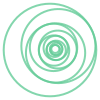

In [11]:
rose = get_rose(
        angle_change=lambda i:golden_angle*i,
        increase=lambda i: 0.25,
        number_of_circles = 11,
    )
rose
# rose_ok = shu.resize(rose,(14,14))
# rose_ok = shu.start_at(rose_ok)
# # shu.size(rose)
# rose_ok

In [5]:
def get_random_rose():
    rose_int = random.randint(70,150)
    rose = get_rose(
        angle_change=lambda i:rose_int*i,
        increase=lambda i: 0.3,
        number_of_circles = 9,
    )
    return rose

In [6]:
pu.reload(shu)

In [40]:
padding_left = 1.5
def get_single_book():
    # padding_top,padding_right,padding_bottom,padding_left
    rose = get_random_rose()
    w,h=shu.size(rose)

    rose_new = sh.affinity.scale(rose, 10/w, 10/w)
    single_book = shu.plot_grid(rose_new,padding=(padding_left,padding_left,6.5,padding_left),box=True)
    return single_book

In [ ]:

shu.size(rose_new)

(10.0, 10.0)

In [35]:
shu.size(get_random_rose())

(21.208998746000006, 21.208998746000006)

In [81]:
a,b = shu.plot_grid([get_single_book() for i in range(2)], rows=1,cols=2)
b = sh.affinity.translate(b, 0.5,0)

In [82]:
roses = shu.printg(*[a,b])

In [83]:
roses = sh.affinity.translate(roses, 1, 1)

In [84]:
roses.bounds

(1.0, -3.5387571233384207, 27.5, 14.46124287666158)

In [85]:
roses = sh.affinity.translate(roses, 0, 4)
roses.bounds

(1.0, 0.46124287666157926, 27.5, 18.46124287666158)

In [43]:
plotter = plu.init_plotter()

In [61]:
plotter.moveto(0.5,0.5)

In [59]:
pu.reload(plu)

In [86]:
plotter.pendown()

In [87]:
plotter.penup()

In [64]:
plotter.options.speed_pendown = 18
plotter.options.pen_rate_lower = 10
plotter.options.pen_rate_raise = 20
plotter.update()
plotter.penup()

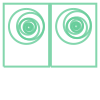

In [88]:
plu.plot(plotter, roses)

(1.0, 0.771109274676899, 27.0, 18.7711092746769)

In [ ]:
boundary = shu.printg(*[shu.geoms(g)[1] for g in shu.geoms(roses)])

In [ ]:
roses

In [ ]:
roses_only = shu.printg(*[shu.geoms(g)[0] for g in shu.geoms(roses)])

In [ ]:
x_min,y_min,x_max,y_max = boundary.bounds
plotter.penup()
iter_points = [[x_min,y_min],[x_max,y_min],[x_max,y_max],[x_min,y_max],]
for x,y in iter_points:
    import pdb
    pdb.set_trace()
    plotter.moveto(x,y)
pdb.set_trace()
    

In [ ]:
plotter.moveto(0,y_max)

In [ ]:
roses

In [ ]:
def padding(geo,padding_top=0,padding_right=0,padding_bottom=0,padding_left=0):
    return 

In [ ]:
resize(start_at_0(aw.rose), ).bounds

In [ ]:
shu.size(resize(g,(1,1)))

In [ ]:
sh.snap()

In [ ]:
# def autotolerance(line,number_points):
#     pass
    

In [ ]:
from shapely.ops import split

# shu.printg(a,p.buffer(1))

In [ ]:
slope_index_selected

In [ ]:
a.segmentize()

In [ ]:
shu.size(rose)